1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.\
a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.
\
b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).
\
c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).
\
d. Use the scikit learn and compare the results of MSE.

[[6.59879928]]
According to the model, MSE =  0.23453892676143337


Text(0.5, 1.0, 'By using inbuilt model')

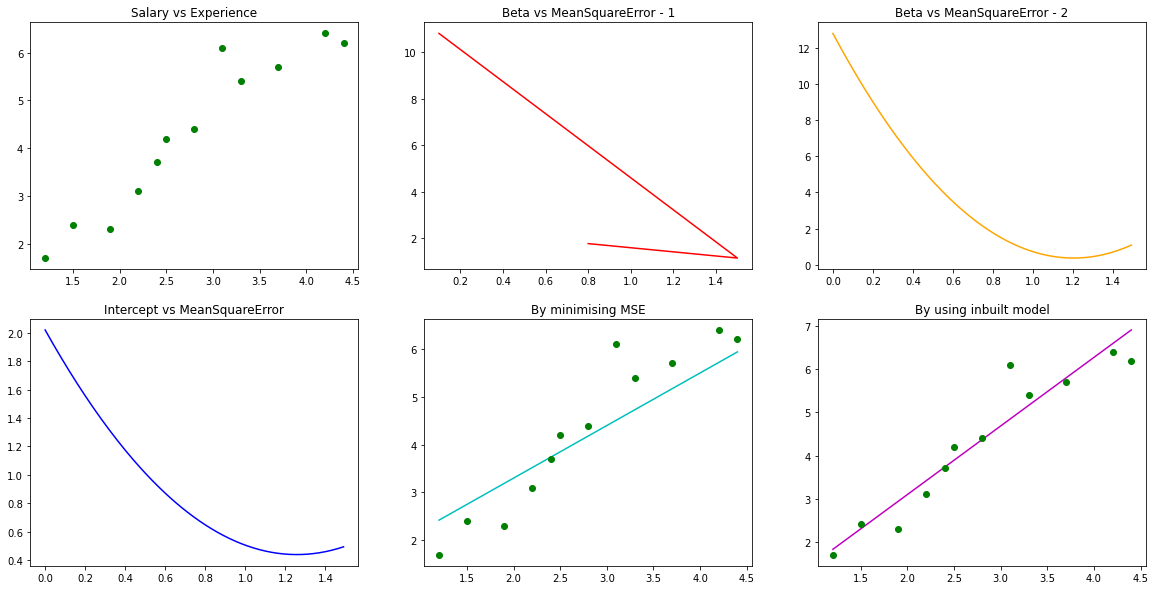

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
se = pd.read_csv("salexp.csv")
x = se.iloc[:,1:]
y = se.iloc[:,0:1]
npx = np.array(x)
npy = np.array(y)
plt.figure(figsize = (20,10))
plt.subplot(2,3,1),plt.plot(x,y,"go")
plt.title("Salary vs Experience")
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.05)
model = LinearRegression()
model.fit(X_train,y_train)
print(model.predict(X_test))
model_coef = model.coef_
model_inter = model.intercept_

#a) For intercept b = 1.1
npy1 = 1.1 + 0.1*npx
npy2 = 1.1 + 1.5*npx
npy3 = 1.1 + 0.8*npx
serror1 = (npy1 - npy)**2
serror2 = (npy2 - npy)**2
serror3 = (npy3 - npy)**2
MSE1 = serror1.sum()/len(npx)
MSE2= serror2.sum()/len(npx)
MSE3= serror3.sum()/len(npx)
beta = [0.1,1.5,0.8]
mse = [MSE1,MSE2,MSE3]
plt.subplot(2,3,2),plt.plot(beta,mse,color='red',)
plt.title("Beta vs MeanSquareError - 1")

#For intercept = 1.1 and varying slope between 0 and 1.5
betas = []
npys = []
mses = []
for i in range(150):
    betas.append(i/100)
    arr = 1.1 + betas[i]*npx
    npys.append(arr)
    serror = (arr-npy)**2
    mses.append(serror.sum()/len(npx))
    
plt.subplot(2,3,3),plt.plot(betas,mses,color = "orange")
plt.title("Beta vs MeanSquareError - 2")

#For beta = 1.1 and varying intercept between 
intercepts = []
npys = []
mses = []
for i in range(150):
    intercepts.append(i/100)
    arr = 1.1*npx + intercepts[i]
    npys.append(arr)
    serror = (arr-npy)**2
    mses.append(serror.sum()/len(npx))
    
plt.subplot(2,3,4),plt.plot(intercepts,mses,color = "blue")
plt.title("Intercept vs MeanSquareError")
print("According to the model, MSE = ",mean_squared_error(y,model.predict(x)))

equation1 = 1.1 + 1.1*npx
plt.subplot(2,3,5),plt.plot(x,equation1,"c"),plt.plot(x,y,"go")
plt.title("By minimising MSE")

equation2 = model_coef*npx + model_inter
plt.subplot(2,3,6),plt.plot(x,equation2,"m"),plt.plot(x,y,"go")
plt.title("By using inbuilt model")

Q2
Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs.\
a. Plot the graph of error versus iteration.\
b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs. \
c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

For learning rate = 0.05
Cost is : 10.520833333333332
Cost is : 2.994560668054107
Cost is : 0.919628341197938
Cost is : 0.34751863486609713
Cost is : 0.18970694450748363
Cost is : 0.14610956134106295
Cost is : 0.1339996098627917
Cost is : 0.13057099401718908
Cost is : 0.12953653629224704
Cost is : 0.12916298314342117
Cost is : 0.1289725036794911
Cost is : 0.1288333611327607
For learning rate = 0.01
Cost is : 10.520833333333332
Cost is : 8.640559087833275
Cost is : 7.100527519440785
Cost is : 5.839169588219182
Cost is : 4.806057558686426
Cost is : 3.959888910798872
Cost is : 3.266835074904952
Cost is : 2.699188973480103
Cost is : 2.234257298679142
Cost is : 1.8534532392228265
Cost is : 1.5415533840525892
Cost is : 1.2860890939361327
For learning rate = 0.02
Cost is : 10.520833333333332
Cost is : 6.947794698555324
Cost is : 4.603386261971384
Cost is : 3.065123340072303
Cost is : 2.0557995747632747
Cost is : 1.3935305853590494
Cost is : 0.9589759346800957
Cost is : 0.6738323626553268
Cost

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


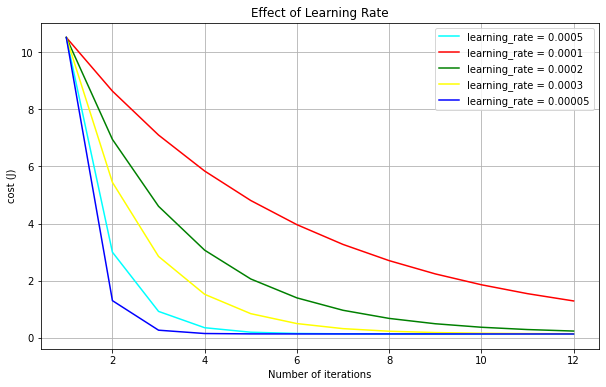

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

se=pd.read_csv("salexp.csv")

dt = se.values

y = dt[:,:-1]
x = dt[:,-1].reshape(dt.shape[0],1)
a=x.shape[0]
ones=np.ones((a,1))
x= np.concatenate((ones,x),axis=1)

def model(x, y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((x.shape[1], 1))
    cost_list = []
    print("For learning rate =",learning_rate)
    for i in range(iteration):
        y_pred = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        print("Cost is :", cost)
    return theta, cost_list    

iteration = 60//5;
learning_rate = 0.05;
theta_1, cost_history_1 = model(x, y, learning_rate, iteration)

learning_rate = 0.01;
theta_2, cost_history_2 = model(x, y, learning_rate, iteration)

learning_rate = 0.02;
theta_3, cost_history_3 = model(x, y, learning_rate, iteration)

learning_rate = 0.03;
theta_4, cost_history_4 = model(x, y, learning_rate, iteration)

learning_rate = 0.07;
theta_5, cost_history_5 = model(x, y, learning_rate, iteration)

plt.plot(range(1, iteration +1), cost_history_1, color ='cyan', label = 'learning_rate = 0.0005')
plt.plot(range(1, iteration +1), cost_history_2, color ='red', label = 'learning_rate = 0.0001')
plt.plot(range(1, iteration +1), cost_history_3, color ='green', label = 'learning_rate = 0.0002')
plt.plot(range(1, iteration +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.0003')
plt.plot(range(1, iteration +1), cost_history_5, color ='blue', label = 'learning_rate = 0.00005')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate")
plt.legend()

sgd = SGDRegressor(penalty = "l2",learning_rate = "invscaling")
sgd.fit(x, y)
y_pred = sgd.predict(x)

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")